In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import tensorflow as tf
import tensorflow_datasets as tfds

sys.path.append("../")
from models.yolo_face_detector import YoloFaceDetector

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
face_detector = YoloFaceDetector(model_path="../model_config/weights/wider_face_yolo.h5",
                                 anchors_path="../model_config/wider_anchors.txt",
                                 classes_path="../model_config/wider_classes.txt")

Model loaded with weights from ../model_config/weights/wider_face_yolo.h5.


In [3]:
ds, ds_info = tfds.load('wider_face', split='train', with_info=True, shuffle_files=True, data_dir='../data')
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {faces: {bbox: (None, 4), blur: (None,), expression: (None,), illumination: (None,), invalid: (None,), occlusion: (None,), pose: (None,)}, image: (None, None, 3), image/filename: ()}, types: {faces: {bbox: tf.float32, blur: tf.uint8, expression: tf.bool, illumination: tf.bool, invalid: tf.bool, occlusion: tf.uint8, pose: tf.bool}, image: tf.uint8, image/filename: tf.string}>


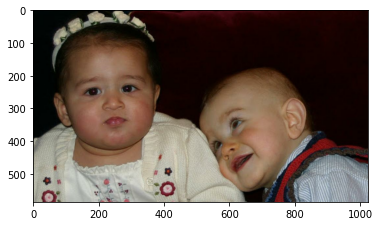

In [4]:
ds_np = list(tfds.as_numpy(ds.take(10)))
example = ds_np[0]
image = example['image']
plt.imshow(image)

In [5]:
faces = face_detector.detect(image)

Face:  (x: 62, y: 138, width: 282, height: 272, score: 0.9995867013931274)
Face:  (x: 494, y: 237, width: 257, height: 297, score: 0.9958202838897705)


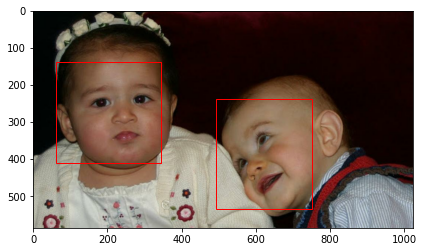

In [6]:
fig, ax = plt.subplots(1)

ax.imshow(image)

for face in faces:
  print('Face: ', face)
  rect = patches.Rectangle((face.x, face.y), face.width, face.height, edgecolor='r', facecolor='None')
  ax.add_patch(rect)

plt.tight_layout()
plt.draw()
plt.show()